# Visualizing CDCs own Excess Deaths calculation

In [28]:
library(tidyverse)
library(geofacet)
library(ggtext)

options(repr.plot.width = 16, repr.plot.height = 9, repr.plot.res = 240,
        readr.show_col_types = F)

colors = c("#8c0900", "#28e6ff", "#ff492a", "#b4b7bd")

theme_set(theme_minimal())

df <- read_rds("data/us_excess_deaths.rds")%>%  
  group_by(State)%>%
  mutate(is_excess = ifelse(`Observed Number`>`Average Expected Count`, "Excess Deaths", "Death 'Deficit'"))%>%
  mutate(min = ifelse(`Observed Number`<=`Average Expected Count`, `Observed Number`, `Average Expected Count`))%>%
  mutate(max = ifelse(`Observed Number`> `Average Expected Count`, `Observed Number`, `Average Expected Count`))%>%
  mutate(group = ifelse(lag(is_excess)==is_excess, 0, 1))%>%
  mutate(group = cumsum(ifelse(is.na(group), 0, group)))

head(df)

State,Week Ending Date,Average Expected Count,Observed Number,Covid Deaths,Population,is_excess,min,max,group
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
Alabama,2019-06-01,999,1027,NA,4907439,Excess Deaths,999,1027,0
Alabama,2019-06-08,993,1029,NA,4907439,Excess Deaths,993,1029,0
Alabama,2019-06-29,982,940,NA,4907439,Death 'Deficit',940,982,1
Alabama,2019-07-06,984,1028,NA,4907439,Excess Deaths,984,1028,2
Alabama,2019-06-15,988,986,NA,4907439,Death 'Deficit',986,988,3
Alabama,2019-06-22,982,990,NA,4907439,Excess Deaths,982,990,4


Warning message:
“Removed 264 rows containing missing values (position_stack).”


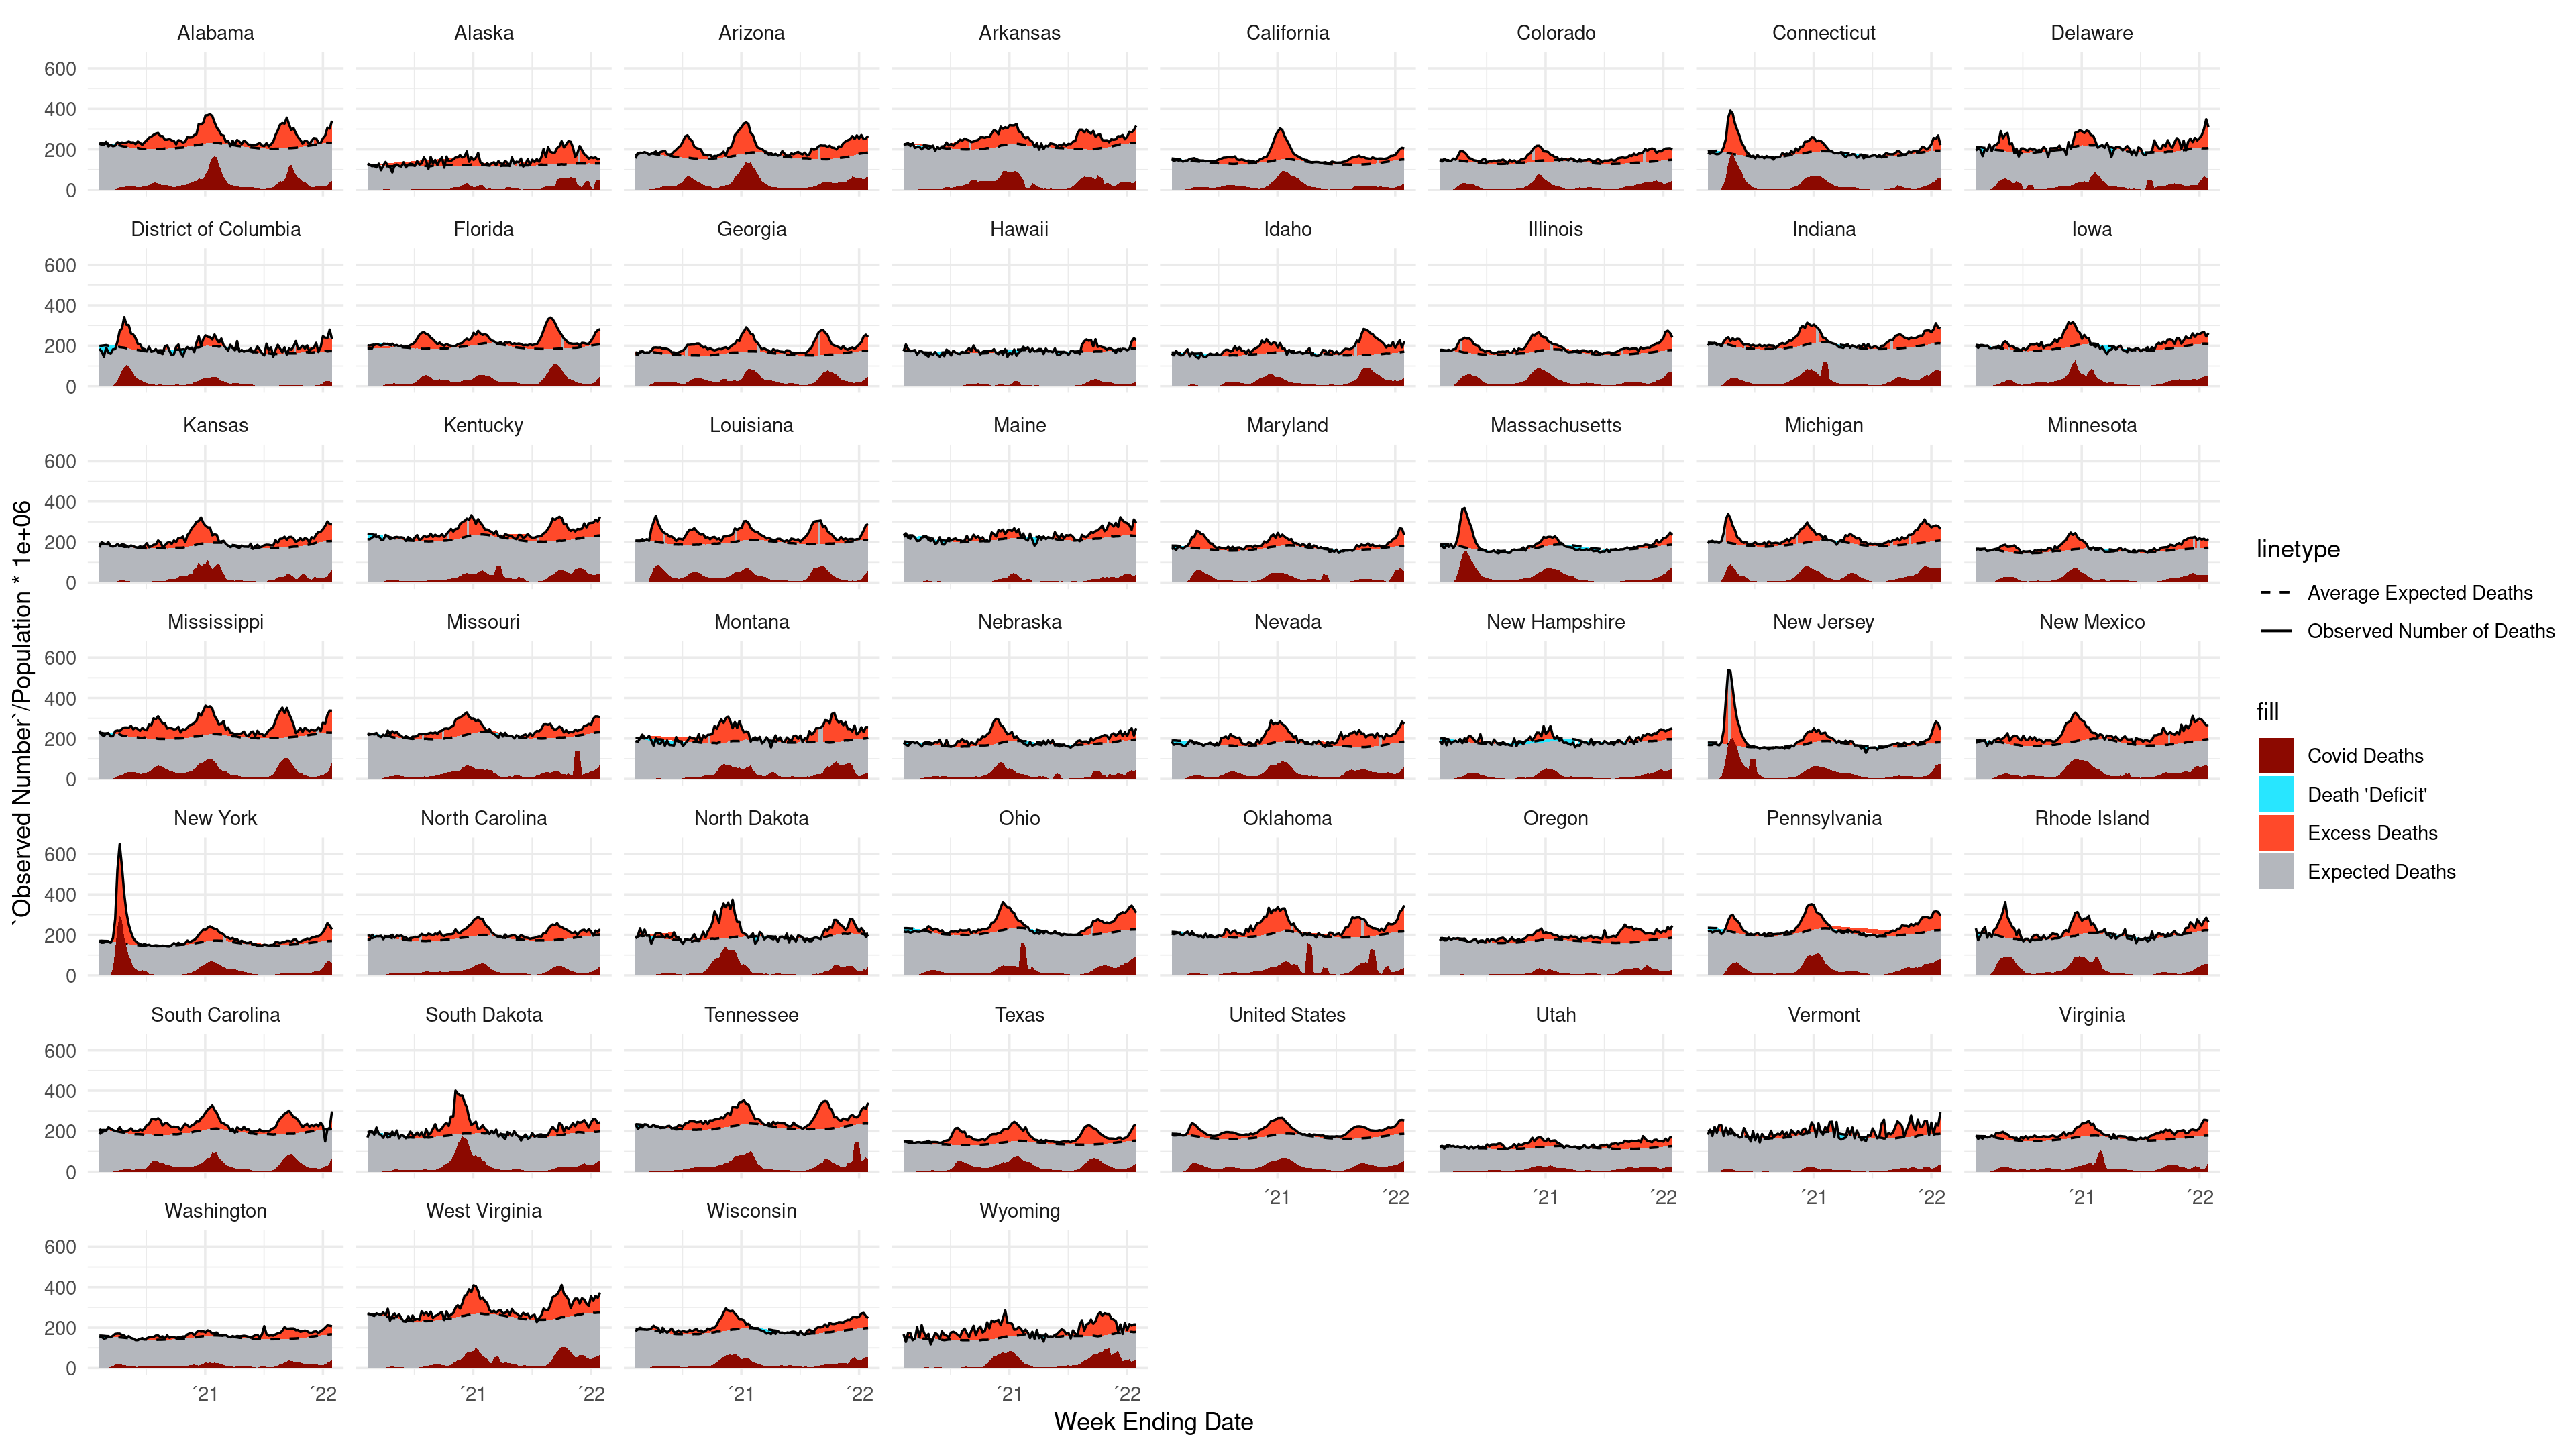

In [29]:
g <- 
  df%>%
  filter(`Week Ending Date`>"2020-02-01")%>%
  filter(`Week Ending Date`<="2022-02-01")%>%
  ggplot(aes(x = `Week Ending Date`, y = `Observed Number`/Population*1000000)) +
  scale_y_continuous(limits = c(0, NA), , labels = scales::comma) +
  scale_x_date(date_labels = "´%y", date_breaks = "1 year") +
  geom_area(aes(fill = "Expected Deaths")) + 
  geom_ribbon(aes(fill = forcats::fct_rev(is_excess),
                  group = group,
                  ymin = min/Population*1000000, 
                  ymax = max/Population*1000000)) +
  geom_line(aes(y = `Observed Number`/Population*1000000, linetype = "Observed Number of Deaths")) +
  geom_line(aes(y = `Average Expected Count`/Population*1000000, linetype = "Average Expected Deaths")) +
  geom_area(aes(y = `Covid Deaths`*7/Population*1000000, fill = "Covid Deaths")) +
  scale_linetype_manual(values=c(2, 1)) +
  scale_fill_manual(values = colors)
 
g + facet_wrap(~State)

Some values in the specified facet_geo column 'State' do not match the
  'name' column of the specified grid and will be removed: United
  States

Warning message:
“Removed 264 rows containing missing values (position_stack).”


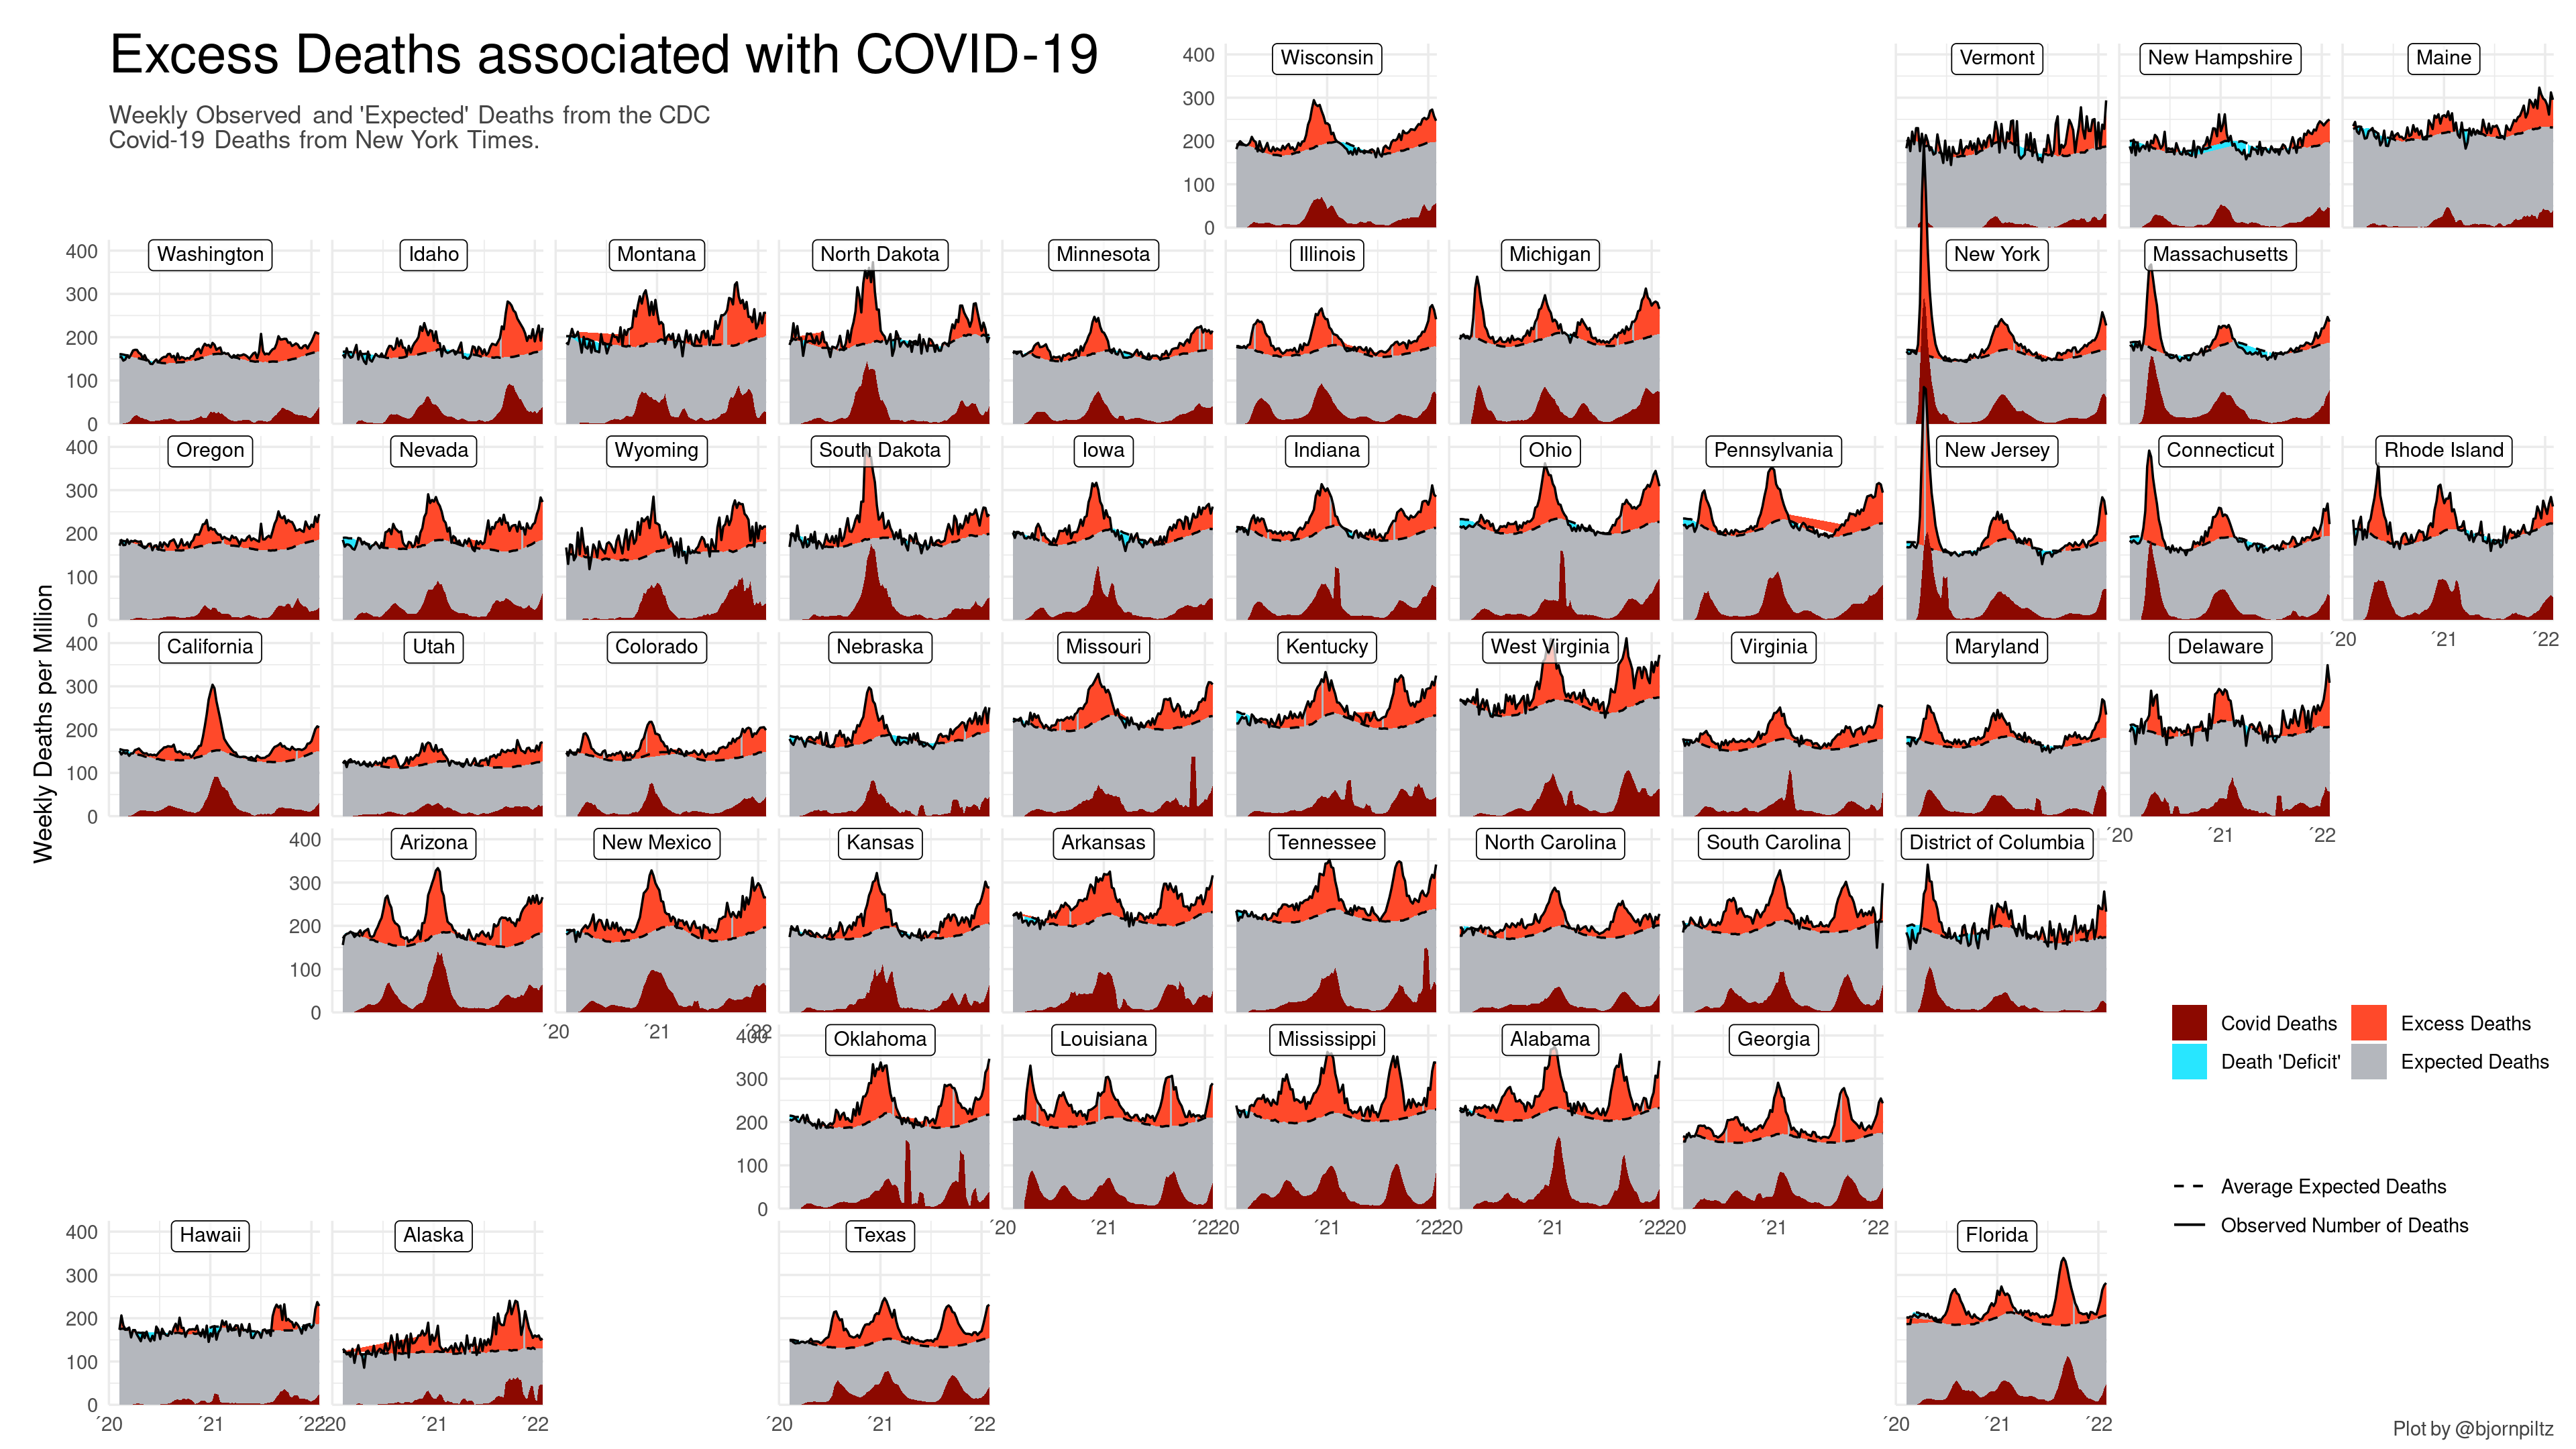

In [30]:
dummy <- 
  df%>%
  group_by(State)%>%
  summarise('Week Ending Date' = as.Date("2021-01-01"))%>%
  filter(!State %in% c("United States", "Puerto Rico"))

g +   
  labs(subtitle = "<span style='color:#444444;'>Weekly Observed and 'Expected' Deaths from the CDC<br>Covid-19 Deaths from New York Times.</span>",
       title = "Excess Deaths associated with COVID-19", x = "", y = "Weekly Deaths per Million",
       caption = "<span style='color:#444444;'>Plot by @bjornpiltz</span>") +
  geom_label(data = dummy, 
             aes(label = State), 
             alpha = 0.7, y = 425, size = 3.2, vjust = 1) +
  coord_cartesian(xlim = as.Date(c("2020-01-01", "2022-02-01")),
                  ylim = c(0, 425), clip = "off",
                  expand = F) +
  theme(strip.text.x = element_blank(),
        legend.position = c(0.92, 0.22),
        plot.title=element_text(margin=margin(t=15, b=-40), size = 24),
        plot.subtitle=element_markdown(margin=margin(t=50, b=-50)),
        plot.margin = margin(b=-30, r = 10, l = 15),        
        plot.caption=element_markdown(margin=margin(t=-21, b = -10))) +
  guides(fill = guide_legend(title = "", nrow = 2),
         linetype = guide_legend(title = "", nrow = 2)) +
  facet_geo(~State)

Warning message:
“Removed 160 rows containing missing values (position_stack).”


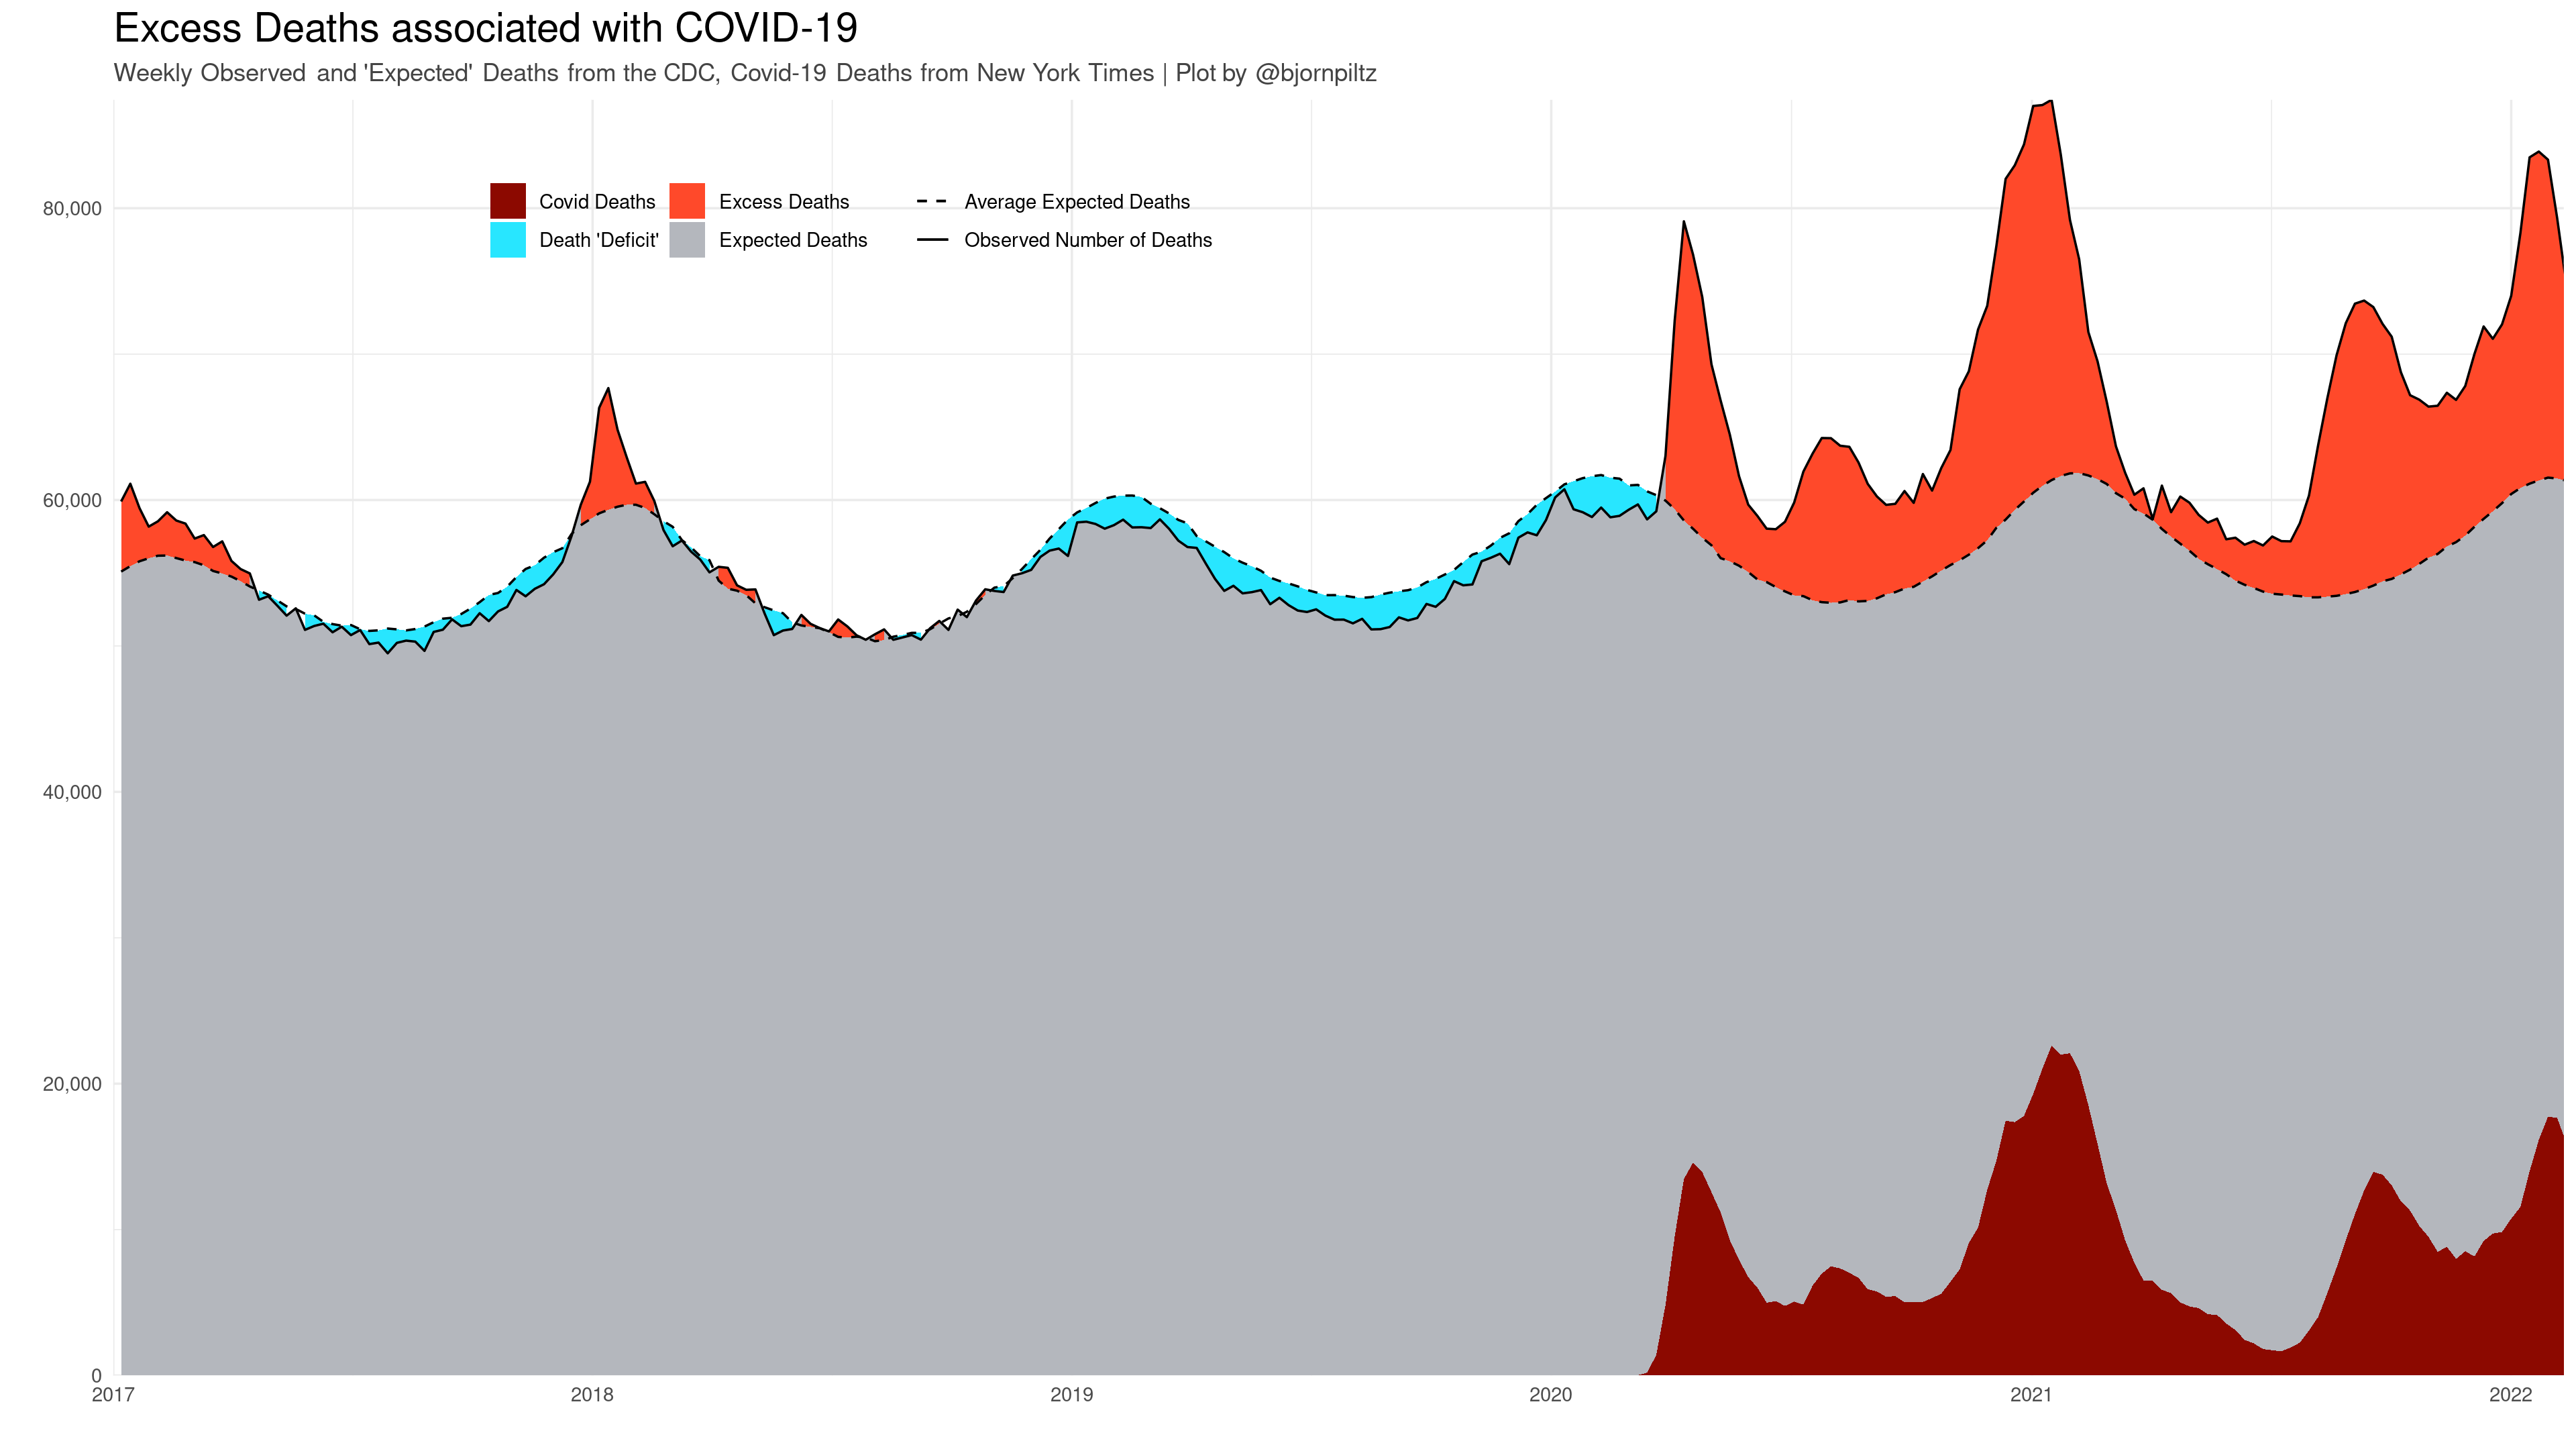

In [31]:
df%>%
  filter(State == "United States")%>%
  ggplot(aes(x = `Week Ending Date`, y = `Observed Number`)) +
  labs(title = "Excess Deaths associated with COVID-19", x = "", y = "",
       subtitle = "<span style='color:#444444;'>Weekly Observed and 'Expected' Deaths from the CDC, Covid-19 Deaths from New York Times | Plot by @bjornpiltz</span>")+
  scale_y_continuous(limits = c(0, NA), labels = scales::comma) +
  scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
  coord_cartesian(xlim = as.Date(c("2017-01-01", "2022-02-10")), expand = F) +
  geom_area(aes(fill = "Expected Deaths")) +
  geom_ribbon(aes(fill = forcats::fct_rev(is_excess),
                  group = group, ymin = min, ymax = max)) +
  geom_line(aes(linetype = "Observed Number of Deaths")) +
  geom_line(aes(y = `Average Expected Count`, linetype = "Average Expected Deaths")) +
  geom_area(aes(y = `Covid Deaths`*7, fill = "Covid Deaths")) +
  scale_linetype_manual(values=c(2, 1)) +
  scale_fill_manual(values = colors) +
  theme(legend.position = c(0.3, 0.92),
        legend.box = 'horizontal',
        plot.title=element_text(size = 18),
        plot.subtitle=element_markdown()) +
  guides(direction = "horizontal",
         fill = guide_legend(title = "", nrow = 2),
         linetype = guide_legend(title = "", nrow = 2))
